In [13]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import display
import graphviz

#############################
# для корректной работы необходимо:
# 
# 1. GraphViz -- пакет утилит по автоматической визуализации графов https://www.graphviz.org/download/
#    


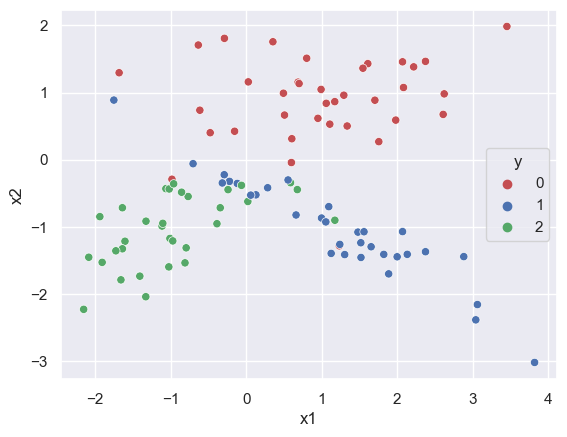

In [14]:
from sklearn import datasets

X, y = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

df=pd.DataFrame(X,columns=['x1', 'x2'])
df['y']=y
df.dtypes
sns.scatterplot(x="x1", y="x2", hue='y', data=df, palette=["r", "b","g"]);

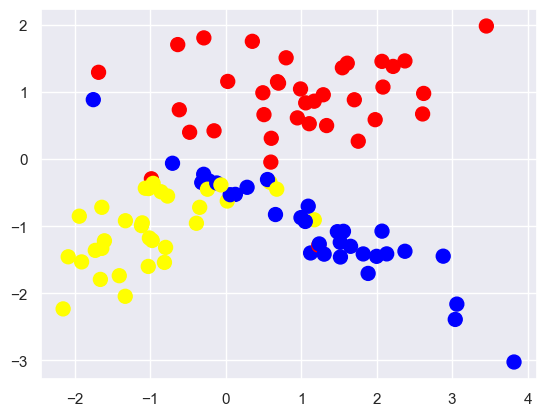

In [15]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.scatter( X[:,0], X[:,1], c=y, cmap=colors, s=100);

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [17]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [27]:
from sklearn import tree
from IPython.display import Image


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    cls=estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
# Если не работает GraphViz
#     tree.plot_tree(estimator)
#     plt.show()

# Если не работает GraphViz установили
    dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=['x1','x2'],  
                     class_names=['red', 'blue', 'yellow'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    display(graph) 
    return

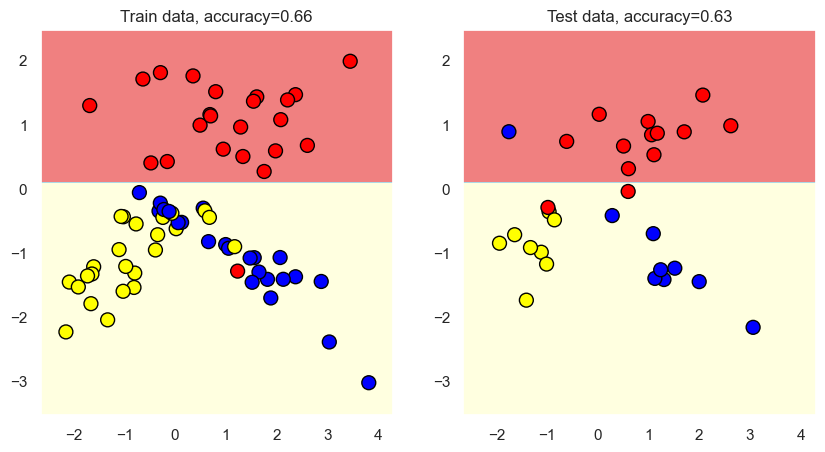

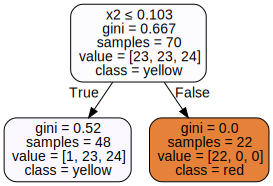

In [19]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

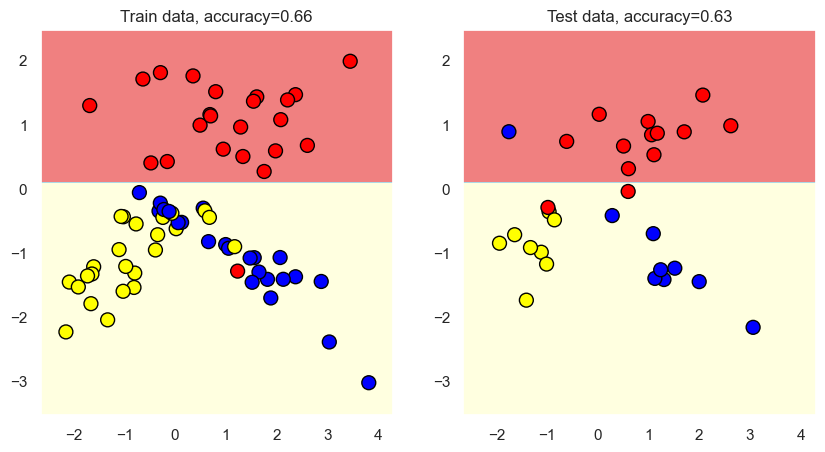

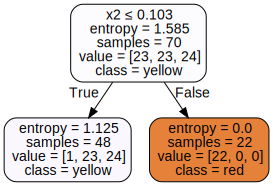

In [20]:
estimator_e = DecisionTreeClassifier(random_state = 1, max_depth = 1, criterion= 'entropy')
plot_decision_surface(estimator_e, X_train, y_train, X_test, y_test, colors, light_colors)

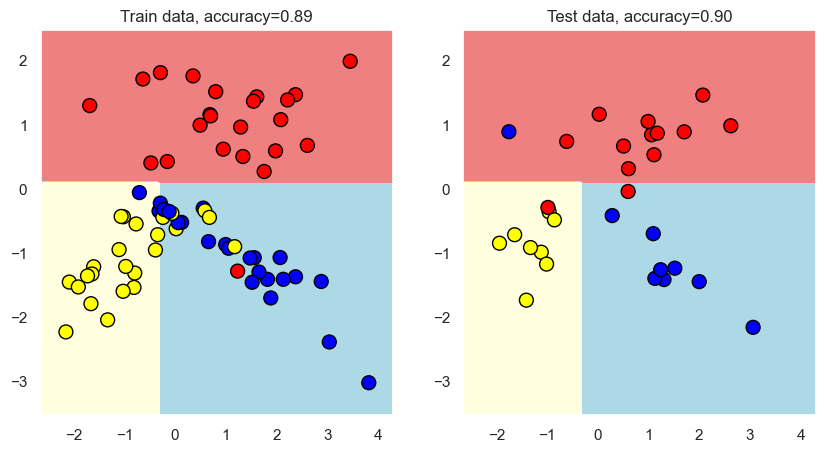

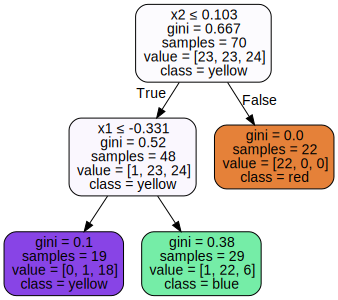

In [21]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

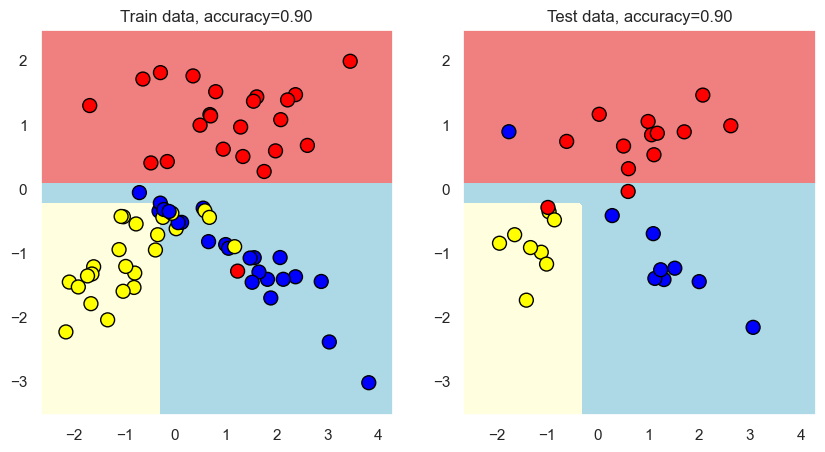

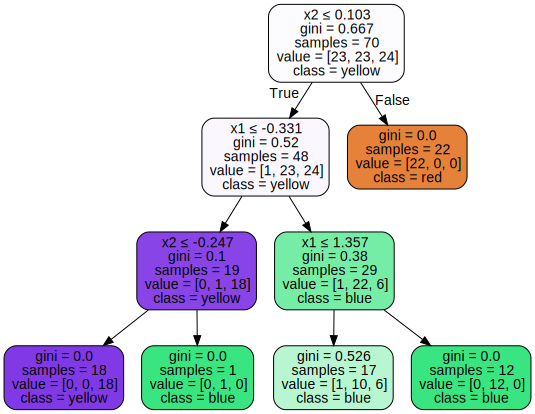

In [22]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 3)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

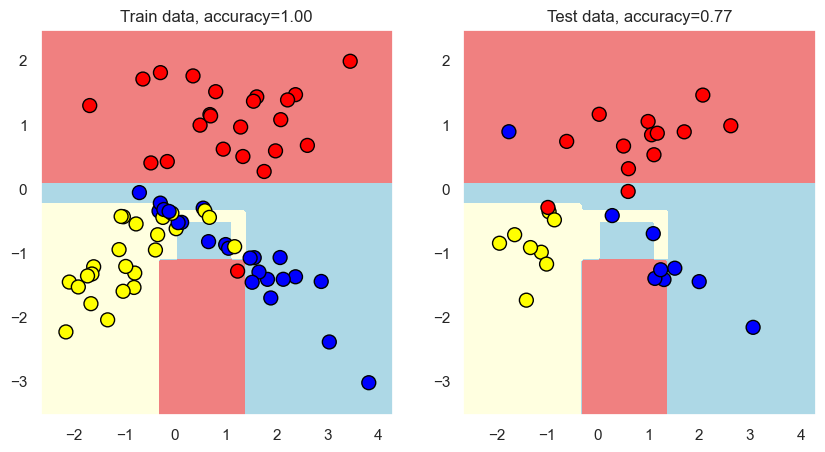

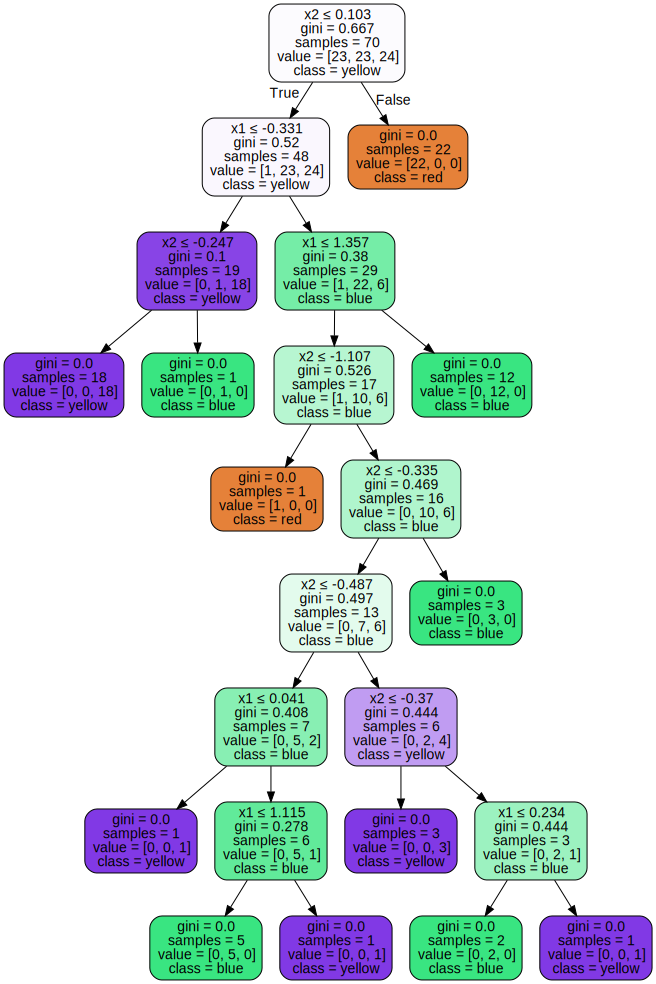

In [23]:
estimator = DecisionTreeClassifier(random_state = 1)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

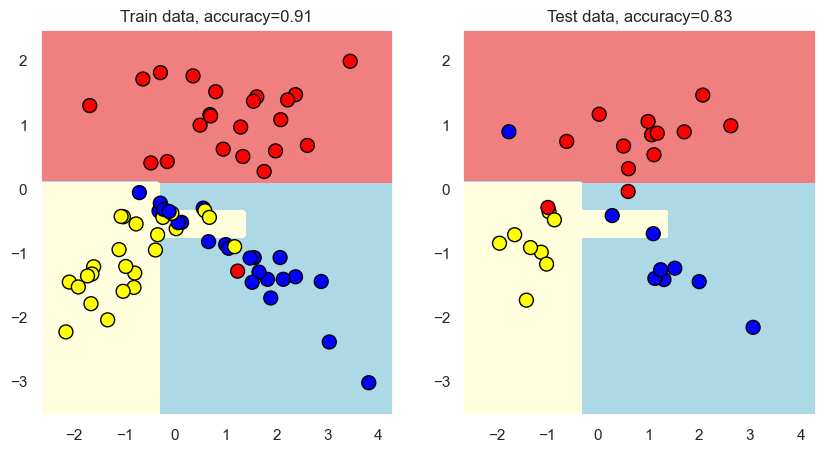

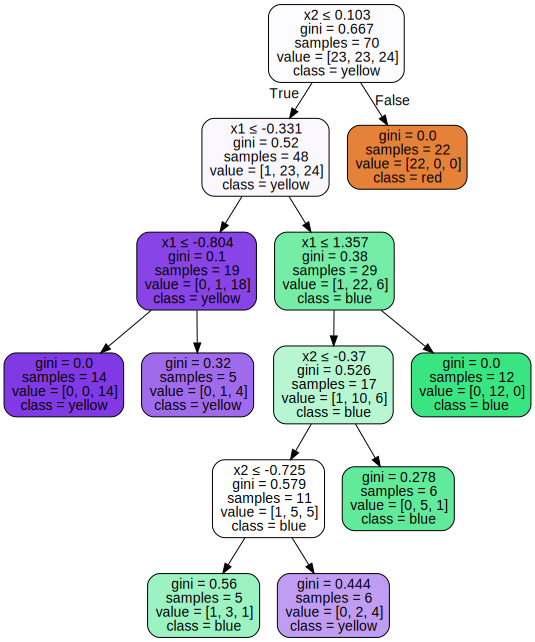

In [24]:
estimator = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 5)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)